<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/ADS_Weekly_Task_5_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do not forget to make a copy before you start!

## **<font color='crimson'> Deadline: 2023/05/31 23:59:00 </font>**



## How to assign your weekly task to Google classroom

- **Recommended:**

  -  Once you copy the task to your own driver, the task colab file is in the [Colab Notebook] folder in you google driver.
  -  Just upload the task **ipynb** file to the Google Classroom.

  - Do not forget to save your colab file before uploading.


- Another way:


- 1. Download the colab file using **'File - download - .ipynb'** in the menu bar.

- 2. You will get a ipynb file in your local laptop, then upload the file to the Google Classroom.



###<font color='crimson'>[Task 1] Regression</font>

Using the following dataset,

https://raw.githubusercontent.com/dgod1028/Research/main/data/boston.csv

The interpretation for the variables are in the following website.
[Boston House price](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)

1. Remaining 20% of data as test data.

1. Predict **Median value of owner-occupied homes in $1000's [k$]** using other variables.

1. Try with at least 3 models including linear regression, Evaluate the models using RMSE.

1. According to the linear regression, what is the relationship between variable CRIM and target variable? Please interpret.


In [ ]:
# Task 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("https://raw.githubusercontent.com/dgod1028/Research/main/data/boston.csv")
df.head()
X = df.drop("MEDV", axis=1)
y = df[["MEDV"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=36)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("回帰分析を用いた場合のRMSEは{:3f}".format(rmse_lr))


回帰分析を用いた場合のRMSEは5.256173
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [ ]:
#ラッソ回帰とリッジ回帰を行った場合のRMSE
from sklearn.linear_model import Lasso, Ridge

# Model 2: Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso回帰を用いた場合のRMSEは{:3f}".format(rmse_lasso))
# Model 3: Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Lidge回帰を用いた場合のRMSEは{:3f}".format(rmse_ridge))

Lasso回帰を用いた場合のRMSEは5.747852
Lidge回帰を用いた場合のRMSEは5.317377


In [ ]:
# Obtain the coefficient and intercept from the linear regression model
coefficient = lr.coef_
intercept = lr.intercept_
print("CRIMの係数", coefficient[0])
print("Intercept:", intercept)

# Print the coefficient and interpret its relationship with the target variable
#print("Coefficient (CRIM):", coefficient[0])
#print("Intercept:", intercept)

CRIMの係数 [-9.68588635e-02  4.41502396e-02  2.70280090e-02  3.03963260e+00
 -1.53461017e+01  3.99326094e+00 -9.00548463e-03 -1.49233358e+00
  2.58415546e-01 -1.09402661e-02 -9.43126562e-01  1.15429577e-02
 -5.41350659e-01]
Intercept: [33.61344487]


###<font color='crimson'>[Task 2] Classification</font>

Using the following dataset,

https://raw.githubusercontent.com/dgod1028/Research/main/data/gender_classification.csv

1. Preprocessing the data.

 1. Use `Gender` as target variable $y$, others as $X$.

 1. Remaining 20% of data as test data.

 1. Other preprocessing on demand.

1. Try with at least 3 models including decision tree(the same model with different parameters are also OK, e.g., change the max_depth parameter for decision tree), Evaluate the models using F1 score.

1. Using decision tree, plot top 5 variables according to the **variable importance**.

1. What is the probability of the Gender=M if this person has follwoing demographic -  `[Cool,Pop,Doesn't drink, Fanta]`?

★ Challenge ★

1. Try to change the target variable to 'Favorite Beverage', use Random Forest as the classifier. Evaluate the model using confusion matrix.(precision, recall, F1 score is not available for non-binary classification problem.)

In [ ]:
# Task 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score
df = pd.read_csv("https://raw.githubusercontent.com/dgod1028/Research/main/data/gender_classification.csv")

#性別をダミー変数に変換
df[["Gender"]] = df[["Gender"]].replace({'F': 0, 'M': 1})
columns_to_convert = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']
newdf = pd.get_dummies(df, columns=columns_to_convert, drop_first=True)

X = newdf.drop("Gender", axis=1)
y = newdf["Gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

max_depthが3の時の、f1スコアは0.22222222222222224
max_depthが5の時の、f1スコアは0.5454545454545454
max_depthが7の時の、f1スコアは0.6666666666666666
[0.24653774 0.24639407 0.14532222 0.13073971 0.11962773]
f1スコアは0.222


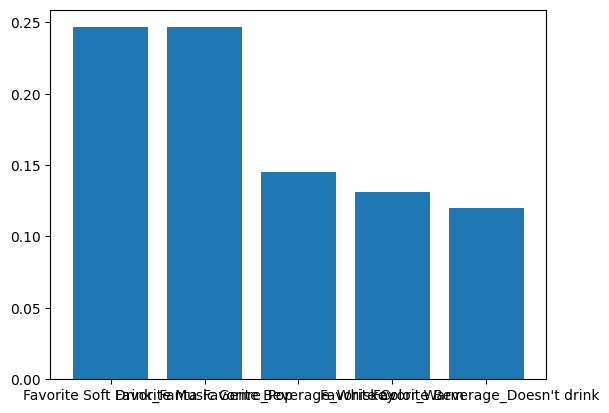

In [ ]:
#決定木でそれぞれ深さを3. 5. 7にした場合のf1スコア
model_1 = DecisionTreeClassifier(max_depth = 3)
model_2 = DecisionTreeClassifier(max_depth = 5)
model_3 = DecisionTreeClassifier(max_depth = 7)
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
y_1_pred = model_1.predict(X_test)
y_2_pred = model_2.predict(X_test)
y_3_pred = model_3.predict(X_test)
print("max_depthが3の時の、f1スコアは{}".format(f1_score(y_test,y_1_pred)))
print("max_depthが5の時の、f1スコアは{}".format(f1_score(y_test,y_2_pred)))
print("max_depthが7の時の、f1スコアは{}".format(f1_score(y_test,y_3_pred)))

#降順に5つ大きいものを並べる
importance = model_1.feature_importances_
labels = X.columns[np.argsort(importance)[::-1]]
importance = np.sort(importance)[::-1]
labels_5 = labels[0:5]
importance_5 = importance[0:5]
print(importance_5)
plt.bar(range(5), importance_5, tick_label =labels_5, align ="center")
predict_1 = model_1.predict(X_test)
f1 = f1_score(y_test, predict_1)
print("f1スコアは{:.3f}".format(f1))